/tmp/ipykernel_3431347/1742728309.py:19: RuntimeWarning: divide by zero encountered in log10
  H_dB = 20 * np.log10(np.abs(H) / np.max(np.abs(H)))  # Normalize and convert to dB


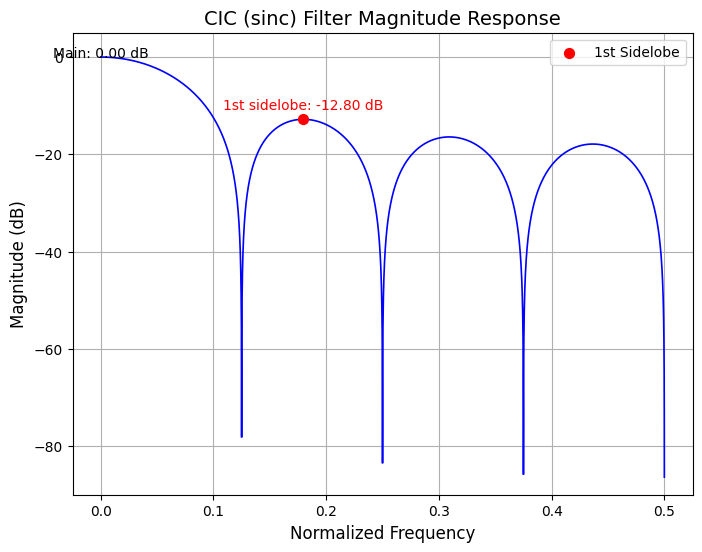

In [1]:
# 测试sinc1/2/3
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# === 1. Parameters ===
D = 8            # Decimation factor
fs = 1.0          # Normalized sampling frequency

# === 2. Construct impulse response ===
h = np.ones(D)                              # sinc1
# h = np.convolve(h, np.ones(D))              # sinc2
# h = np.convolve(h, np.ones(D))              # sinc3

# === 3. Compute frequency response ===
w, H = freqz(h, worN=32768, fs=fs)

# === 4. Convert magnitude to dB ===
H_dB = 20 * np.log10(np.abs(H) / np.max(np.abs(H)))  # Normalize and convert to dB

# === 5. Plot ===
plt.figure(figsize=(8, 6))
plt.plot(w, H_dB, color='blue', linewidth=1.2)
plt.title("CIC (sinc) Filter Magnitude Response", fontsize=14)
plt.xlabel("Normalized Frequency", fontsize=12)
plt.ylabel("Magnitude (dB)", fontsize=12)
plt.grid(True)
plt.ylim(-90, 5)

# === 6. Annotate main lobe ===
main_peak_idx = np.argmax(H_dB)
plt.text(w[main_peak_idx], H_dB[main_peak_idx],
         f"Main: {H_dB[main_peak_idx]:.2f} dB", fontsize=10, ha='center')

# === 7. Find first sidelobe ===
# CIC zeros are at f = k / D (k = 1, 2, ...)
# First sidelobe is between f = 1/D and f = 2/D
f_zero1 = 1 / D
f_zero2 = 2 / D

# Select data in the first sidelobe region
mask = (w > f_zero1) & (w < f_zero2)

# Find index of maximum magnitude in that region
first_sidelobe_idx_local = np.argmax(H_dB[mask])
first_sidelobe_idx_global = np.arange(len(w))[mask][first_sidelobe_idx_local]

# === 8. Annotate the first sidelobe ===
plt.scatter(w[first_sidelobe_idx_global], H_dB[first_sidelobe_idx_global],
            color='red', s=50, zorder=5, label="1st Sidelobe")
plt.text(
    w[first_sidelobe_idx_global],
    H_dB[first_sidelobe_idx_global] + 2,
    f"1st sidelobe: {H_dB[first_sidelobe_idx_global]:.2f} dB",
    color='red',
    fontsize=10,
    ha='center'
)

plt.legend()
plt.show()


/tmp/ipykernel_3431347/1472329075.py:21: RuntimeWarning: divide by zero encountered in log10
  H_dB = 20 * np.log10(np.abs(H) / np.max(np.abs(H)))


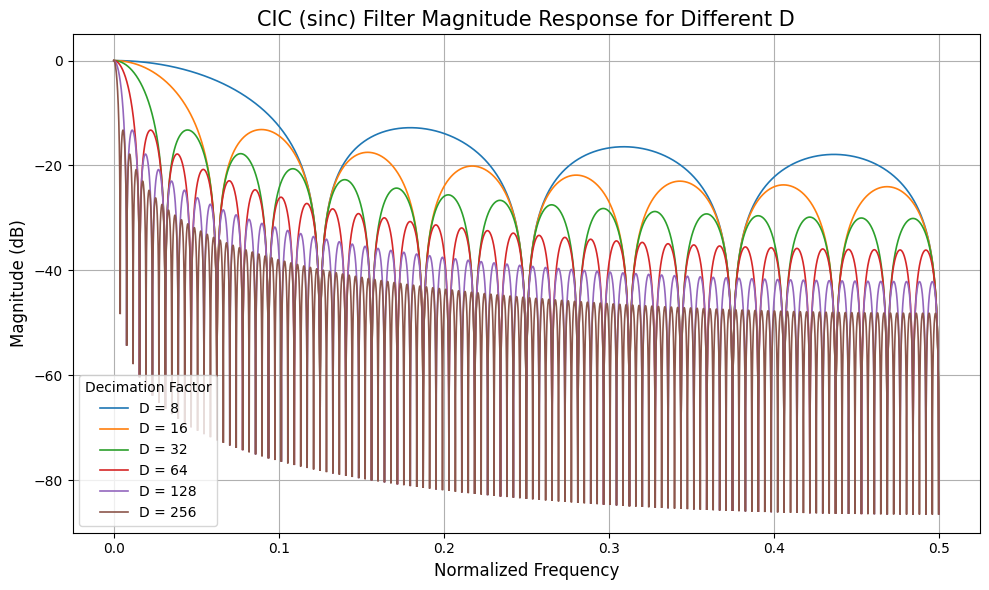

In [2]:
# 相同的order，不同的osr
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# === 1. Define different decimation factors ===
D_list = [8, 16, 32, 64, 128, 256]
fs = 1.0  # Normalized sampling frequency

plt.figure(figsize=(10, 6))

# === 2. Loop over each D and plot response ===
for D in D_list:
    # Construct impulse response (length = D)
    h = np.ones(D)

    # Compute frequency response
    w, H = freqz(h, worN=32768, fs=fs)

    # Convert to dB (normalize to main lobe)
    H_dB = 20 * np.log10(np.abs(H) / np.max(np.abs(H)))

    # Plot each curve with a label
    plt.plot(w, H_dB, linewidth=1.2, label=f"D = {D}")

# === 3. Plot settings ===
plt.title("CIC (sinc) Filter Magnitude Response for Different D", fontsize=15)
plt.xlabel("Normalized Frequency", fontsize=12)
plt.ylabel("Magnitude (dB)", fontsize=12)
plt.grid(True)
plt.ylim(-90, 5)
plt.legend(title="Decimation Factor", fontsize=10)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3431347/3072173758.py:24: RuntimeWarning: divide by zero encountered in log10
  H_dB = 20 * np.log10(np.abs(H) / np.max(np.abs(H)))


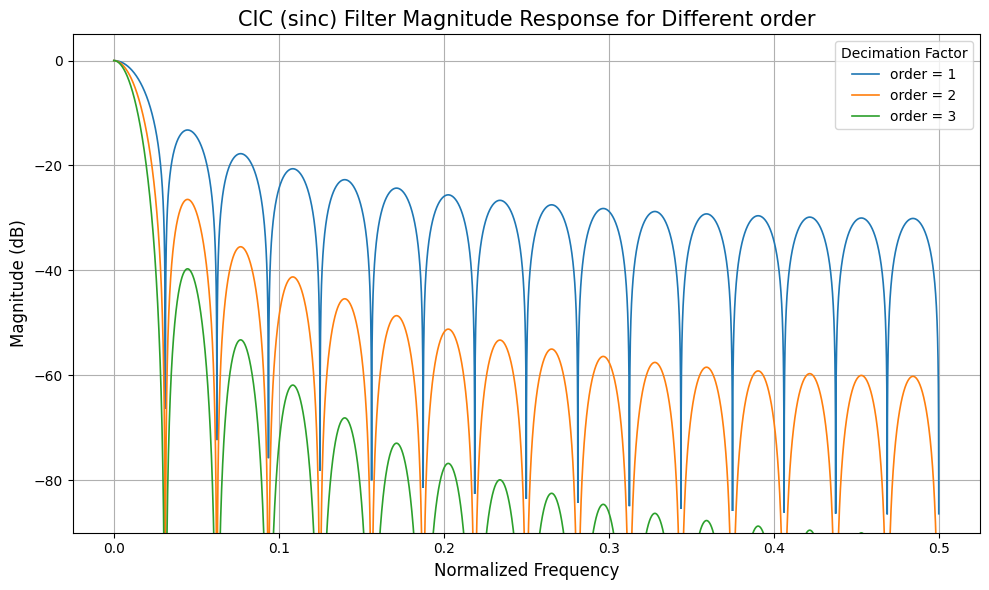

In [3]:
# 相同osr，不同的order
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# === 1. Define different decimation factors ===
D = 32
fs = 1.0  # Normalized sampling frequency

plt.figure(figsize=(10, 6))

h_list = (np.ones(D), np.convolve(np.ones(D), np.ones(D)), np.convolve(np.convolve(np.ones(D), np.ones(D)), np.ones(D)))

# === 2. Loop over each D and plot response ===
order = 1
for h in h_list:
    # Construct impulse response (length = D)
    # h = np.ones(D)

    # Compute frequency response
    w, H = freqz(h, worN=32768, fs=fs)

    # Convert to dB (normalize to main lobe)
    H_dB = 20 * np.log10(np.abs(H) / np.max(np.abs(H)))

    # Plot each curve with a label
    plt.plot(w, H_dB, linewidth=1.2, label=f"order = {order}")
    order = order + 1

# === 3. Plot settings ===
plt.title("CIC (sinc) Filter Magnitude Response for Different order", fontsize=15)
plt.xlabel("Normalized Frequency", fontsize=12)
plt.ylabel("Magnitude (dB)", fontsize=12)
plt.grid(True)
plt.ylim(-90, 5)
plt.legend(title="Decimation Factor", fontsize=10)
plt.tight_layout()
plt.show()


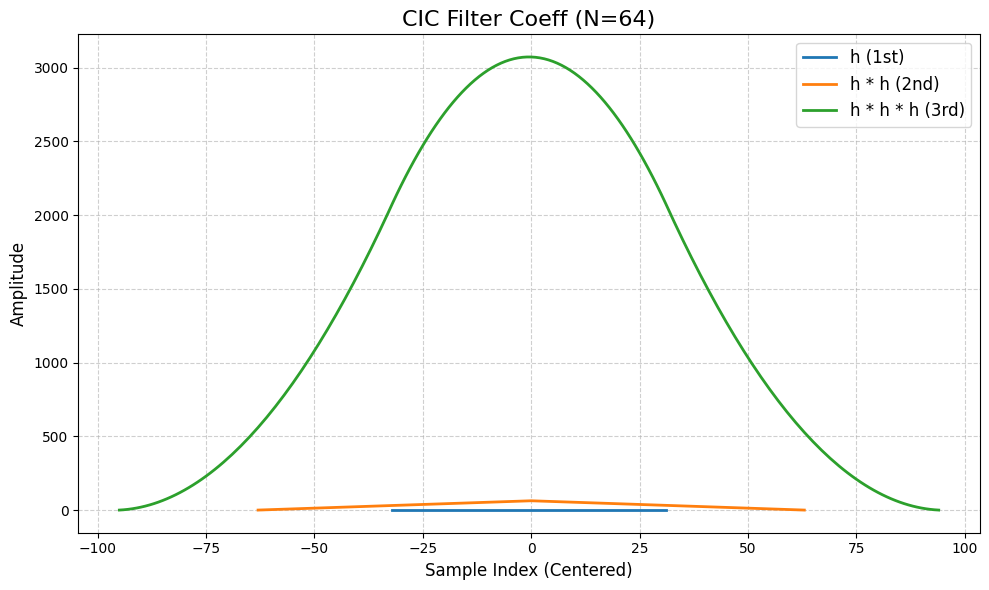

In [5]:
# cic 滤波器系数绘图
import numpy as np
import matplotlib.pyplot as plt

# === 1. 定义脉冲响应 ===
N = 64
h = np.ones(N)              # 原始boxcar滤波器

# === 2. 计算卷积 ===
h2 = np.convolve(h, h)      # h * h
h3 = np.convolve(h2, h)     # h * h * h

# === 3. 构建时间轴（为了居中对齐）
n_h = np.arange(-(len(h)-1)//2, (len(h)-1)//2 + 1)
n_h2 = np.arange(-(len(h2)-1)//2, (len(h2)-1)//2 + 1)
n_h3 = np.arange(-(len(h3)-1)//2, (len(h3)-1)//2 + 1)

# === 4. 绘制图像 ===
plt.figure(figsize=(10, 6))

plt.plot(n_h, h, label='h (1st)', linewidth=2)
plt.plot(n_h2, h2, label='h * h (2nd)', linewidth=2)
plt.plot(n_h3, h3, label='h * h * h (3rd)', linewidth=2)

# === 5. 图形美化 ===
plt.title("CIC Filter Coeff (N=64)", fontsize=16)
plt.xlabel("Sample Index (Centered)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
